In [25]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn
import time
from datetime import datetime
from sklearn import preprocessing

In [26]:
#import dataframe
sents = pd.read_csv("SA_Original_Concat.csv", delimiter = ",", parse_dates=[5])

[]

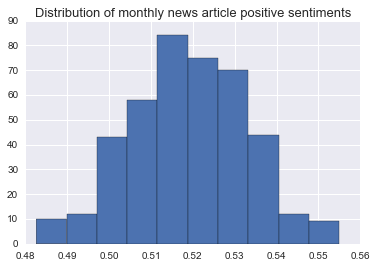

In [27]:
#plot distribution of positive scores
plt.hist(sents['positive_standard'])
plt.title("Distribution of monthly news article positive sentiments", fontsize = 13)
plt.plot()

[]

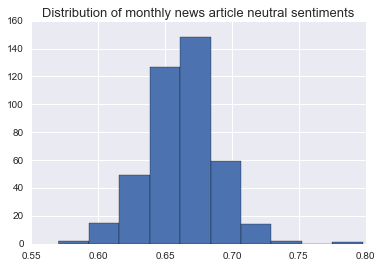

In [28]:
#plot distribution of neutral scores
plt.hist(sents['neutral_standard'])
plt.title("Distribution of monthly news article neutral sentiments", fontsize = 13)
plt.plot()

In [15]:
#function to calculate moving averages
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [30]:
#calculate moving averages
MA_sent = (movingaverage(np.array(sents.ix[:, 2]), 20))[10:-10]
MA_MCI = (movingaverage(np.array(sents.ix[:, 6]), 20))[10:-10]

In [31]:
#standarize
MCI_scaled = preprocessing.scale(MA_MCI)
sent_scaled = preprocessing.scale(MA_sent)

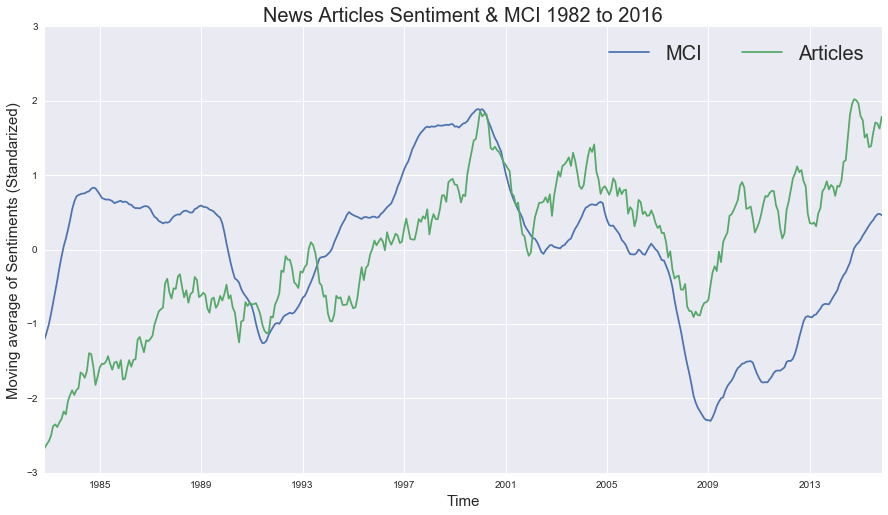

In [33]:
# co-plot MCI and NYTimes sentiment standarized
fig, ax1 = plt.subplots(1, 1, figsize = (15, 8))
mci, = ax1.plot(sents['Time'][10:-10], MCI_scaled)
sent, = ax1.plot(sents['Time'][10:-10], sent_scaled)

ax1.set_xlabel("Time", fontsize = 15)
ax1.set_ylabel("Moving average of Sentiments (Standarized)", fontsize = 15)
ax1.set_title("News Articles Sentiment & MCI 1982 to 2016", fontsize = 20)

ax1.legend((mci, sent),
           ('MCI', 'Articles'),
           loc='upper right',
           ncol=3,
           fontsize=20)

plt.show()